# Research With Future Scenario

Let us do some research now, with help of the [CMIP6 dataset](https://pcmdi.llnl.gov/CMIP6/).
We will look how our model fares with historical CMIP data and their climate models that predict future scenarios.
I have setup some possible climate change models for you to use, you have to fill in your camel ID and think of a research question!

We like the sentence:
- To understand [environment issue] in [region] we will study te impact of [verb/noun] on [hydrological variable].

But feel free to come up with your own!
Some hints:
- Maybe look at a smaller time period.
- What do certain climate changes do to your region.

## In This Notebook: Research with CMIP data

In this notebook we will do the model runs for the chosen areas with the generated forcing from the previous notebook.
This will be used to do our research with!

## Importing and setting up

In [1]:
# Ignore user warnings :)
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Required dependencies
import ewatercycle.forcing
import ewatercycle.observation.grdc
import ewatercycle.analysis
from pathlib import Path
from cartopy.io import shapereader
import pandas as pd
import numpy as np
from rich import print
import xarray as xr
import shutil
import ewatercycle
import ewatercycle.models

from util_functions import *

**TO DO**

Change to your region here, you can change the folder structure as well, but note that you will have to change that in upcoming notebooks as well!

In [2]:
# Copy your camel ID from previous Notebook
camel_id = "AF_1531450.0"

In [3]:
# Defining path for catchment shape file
central_path = "/data/datasets/ghana/camel_data"

path_to_save = Path.home() / "my_data/workshop_ghana"
path_to_save.mkdir(exist_ok=True, parents=True)

shape_file = central_path + "/shapefiles" + f"/{str(camel_id[:-2])}" + f"/{str(camel_id[:-2])}.shp"
data_file_nc = central_path + (f"/{camel_id}.nc")

my_data_nc = xr.open_dataset(data_file_nc, engine="netcdf4")

# Defining destination path for CMIP data
forcing_path_CMIP = path_to_save / "CMIP_forcing"
forcing_path_CMIP.mkdir(exist_ok=True)

# Model HBV destination path
model_path_HBV = path_to_save / "CMIP_HBV"
model_path_HBV.mkdir(exist_ok=True)

In [5]:
historical_start = "1975-01-01"
historical_end = "1979-12-31"

future_start_data = "2026-01-01"
future_end_data = "2099-12-31"

## Enter your research here!
I looked at the cumulative sum of the discharge as a simle example, up to you to implement your own!

In [6]:
# Load in the data again for the scenarios (note you can still load historical data here if you want)
SSP126_output = pd.read_pickle(forcing_path_CMIP / "SSP126" / "output.pkl")
SSP245_output = pd.read_pickle(forcing_path_CMIP / "SSP245" / "output.pkl")
SSP585_output = pd.read_pickle(forcing_path_CMIP / "SSP585" / "output.pkl")

In [7]:
# Change this to do what you want!
cum_sum_126 = np.cumsum(SSP126_output)
cum_sum_245 = np.cumsum(SSP245_output)
cum_sum_585 = np.cumsum(SSP585_output)

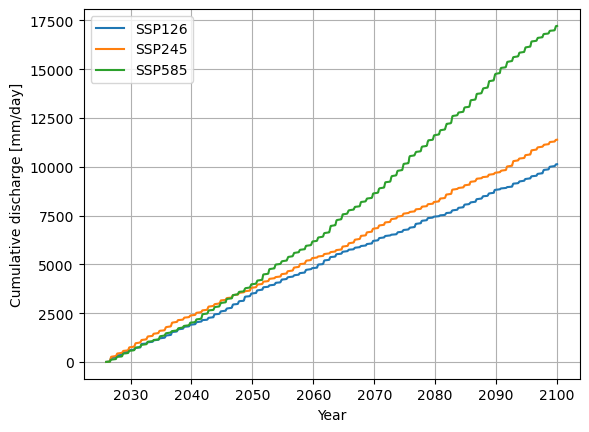

In [8]:
plt.plot(cum_sum_126, label="SSP126")
plt.plot(cum_sum_245, label="SSP245")
plt.plot(cum_sum_585, label="SSP585")
plt.ylabel("Cumulative discharge [mm/day]")
plt.xlabel("Year")
plt.grid()
plt.legend()
plt.show()